<a href="https://colab.research.google.com/github/vidumini-atha/ML-Loan-Prediction/blob/main/Loan_Approval_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Approval Prediction**
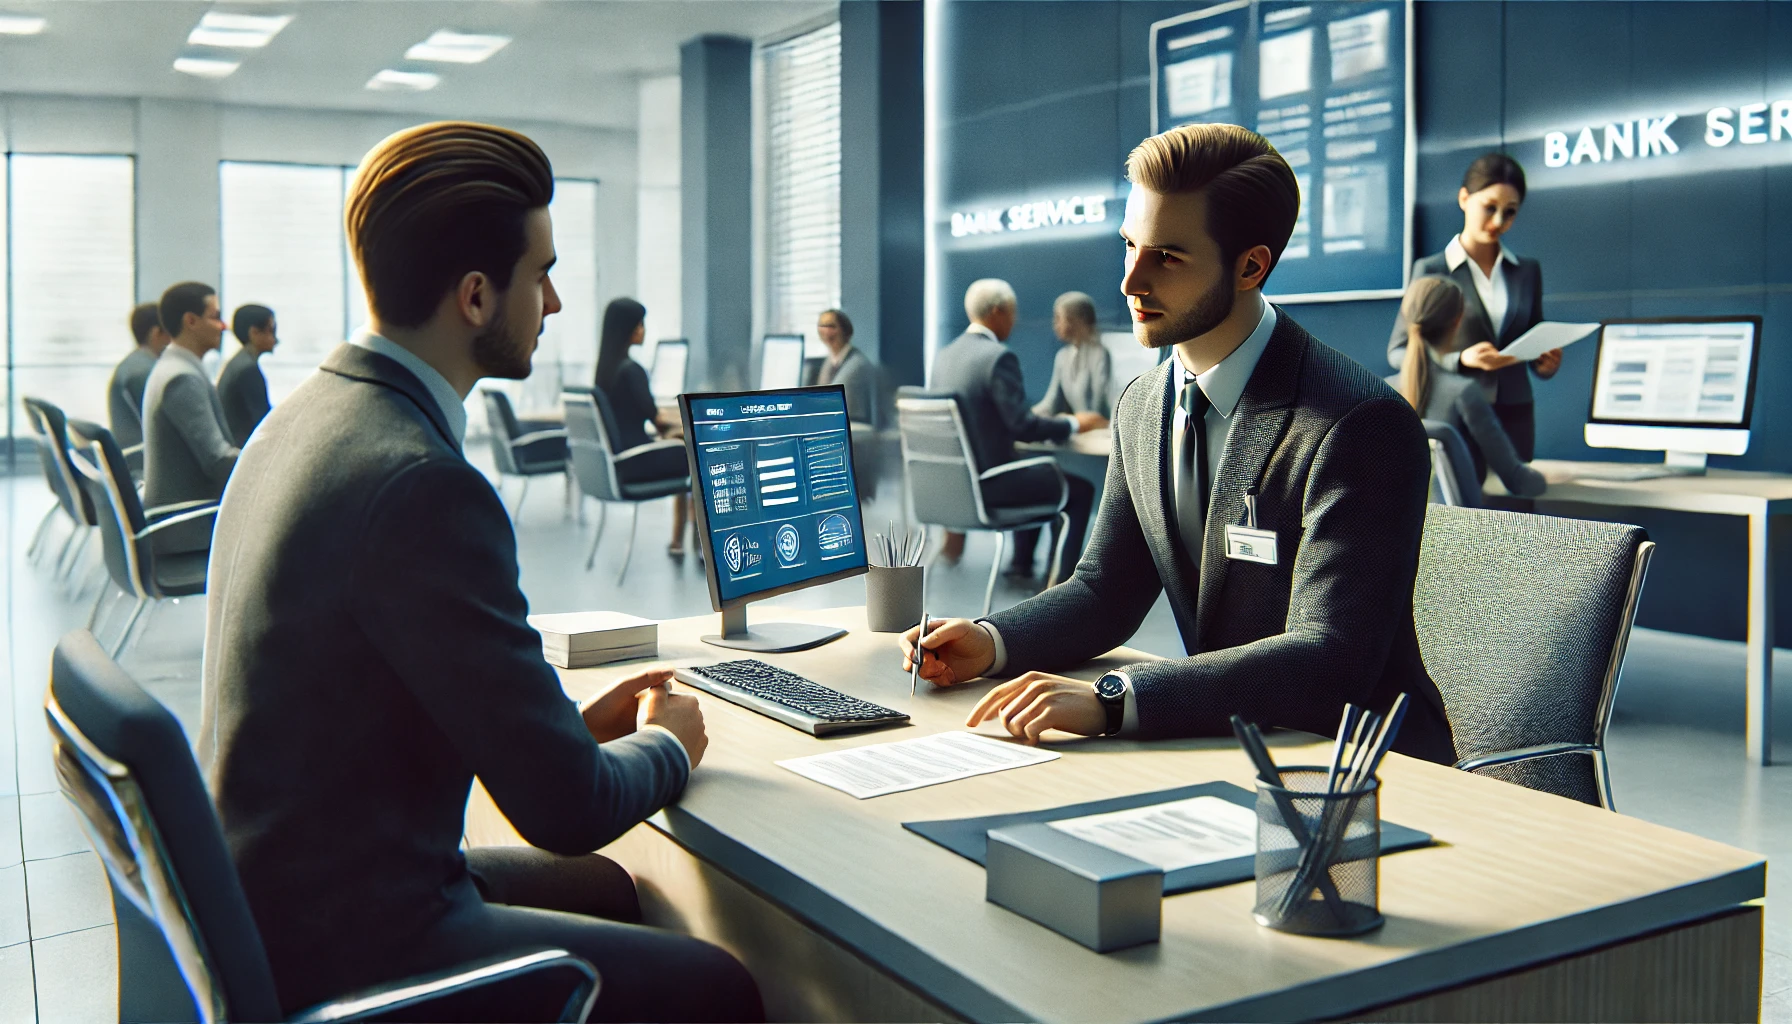


**Group Number:** 36

**Student Names and Registration Numbers:**

*   Arachchi W.A.T.T.W.   - EG/2021/4412
*   Athapaththu A.A.V.S.  - EG/2021/4418

**Introduction**

In this project we are going to utilize the Loan Prediction Problem Dataset Dataset from Kaggle which consisit of various features which might influence the Loan Approval Process. By applying machine learning techniques, we aim to build a predictive model to streamline the loan approval decision-making process, ensuring accuracy and efficiency.

**Dataset Description**

Dataset link: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

This dataset consists of 12 features influencing the loan approval process and a target variable indicating loan approval status. Key details include:



*   Applicant Information: Gender, marital status, dependents, education level, and
employment status.
*   Financial Attributes: Applicant income, co-applicant income, loan amount, and loan term.
*   Credit History: Indicates if the applicant has a history of credit defaults.

*   Property Details: Type of area where the property is located (urban, semi-urban, or rural).

*   Target Variable: Loan status, which specifies if a loan is approved or not.

 In this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict loan approval.

**Machine learning Models:**


In this project, we will use the following machine learning models to predict loan approval:


*   Logistic Regression
*   Random Forest Classifiier

To evaluate the performance of machine learning models, the following metrics will be used:

*   Accuracy
*   Precision
*   Recall (Sensitivity)
*   F1-Score
*   ROC-AUC Score
*   Confusion Matrix

**Literature Survey:**

Loan approval prediction is a critical task for financial institutions. Machine learning techniques have significantly improved the efficiency and accuracy of this process compared to traditional methods. This survey summarizes existing methods, insights from past research, and ethical considerations.

1. **Existing Methods and Approaches:**


*   **Statistical Models:**
Traditional methods like Logistic Regression and Decision Trees have been widely used for loan and credit risk evaluation. These methods are simple and interpretable but struggle with capturing complex, non-linear patterns in the data.
*   **Advanced Machine Learning Models:**
Advanced machine learning models, such as:

  Support Vector Machines (SVM): Effective for high-dimensional data and classification tasks.

  Random Forests: Can model non-linear relationships and feature interactions well.

  Gradient Boosted Machines (e.g., XGBoost, LightGBM): Known for high predictive accuracy and handling complex datasets.


*   **Deep learning:** Deep learning techniques like Multi-Layer Perceptrons (MLPs) are used for complex problems requiring large datasets. However, these models are computationally intensive and less interpretable.
*  **Hybrid techniques:** Combining models using ensemble methods, such as bagging, boosting, and stacking, has been a popular approach. These techniques help improve accuracy by leveraging the strengths of multiple models.


2. **Previous Research Contributions:**


*   Credit Scoring Models:

  Early methods like logistic regression focused on credit scoring but lacked flexibility in modeling complex data.

  Studies revealed limitations in handling non-linear relationships and feature interactions.Credit Scoring Models:

*   Machine Learning for Loan Prediction:

  Research by Patel et al. (2018) showed that Random Forests and Gradient Boosted Trees outperformed traditional models in predicting loan defaults.

  SVM was highlighted for its effectiveness with high-dimensional data and classification tasks.


*   Deep Learning Advancements:

   Recent work by Zhang et al. (2021) used Convolutional Neural Networks (CNNs) for tabular data, showing promising results.

   Recurrent Neural Networks (RNNs) have been applied to analyze repayment history trends, especially in temporal datasets.





  


In conclusion, machine learning techniques have greatly enhanced the accuracy and efficiency of loan approval prediction. However, there is still room for improvement, and further research is needed to explore advanced methods and address challenges such as model interpretability and fairness in decision-making processes.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the Necessary Libraries


*   pandas: Used for data manipulation and analysis,
*   numpy: Used for numerical operations and working with arrays and matrices.
*   seaborn:used for creating attractive statistical visualizations.
*   matplotlib.pyplot: Provides functions for creating static, animated, and interactive plots.
*   %matplotlib inline: Ensures that plots are displayed directly within Jupyter Notebook cells.









In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Suppress warning messages
#This ignores unnecessary messages when doing data visualization

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [ ]:
#Load the dta set as a pandas data frame

df = pd.read_csv('/content/drive/MyDrive/ML Workshop/loan_approval.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML Workshop/loan_approval.csv'

In [ ]:
#First five rows of the dataset

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Last five rows of the dataset

df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is analyzing data to understand its main features and patterns before deeper analysis.
It is important because it helps to:

* EDA shows the dataset’s features, types, and distributions.
* It uncovers relationships between variables for better analysis.
* EDA finds errors or unusual data points that may affect results.
* It highlights missing or incorrect data for improvement.

In [ ]:
#Shape of the loaded dataframe

df.shape

(614, 13)

In [ ]:
#Columns in the dataset

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#print a concise summary of the pandas dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Generate descriptive analytics for the numerical features in the dataset

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Visualization

Data visualization is the process of turning complex data into visual formats, making it easier to understand. It includes:

- **Charts**: Bar, line, and pie charts.
- **Graphs**: Scatter plots and histograms.
- **Maps**: Geographic and heat maps.
- **Dashboards**: Interactive platforms with multiple visuals.

The goal is to make data easier to interpret, helping users spot patterns, trends, and outliers, especially in large datasets.

In [ ]:
# Seperate the features and target from the dataset.

X = df.drop(columns = ['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [ ]:
# Display the shape of the feature set and target

print(X.shape)
print(y.shape)

(614, 12)
(614,)


In [ ]:
# Split the dataset into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [ ]:
# Print the shape of training data set

print(X_train.shape, y_train.shape)

(460, 12) (460,)


In [ ]:
# Print the shape of testing data set

print(X_test.shape, y_test.shape)

(154, 12) (154,)


In [ ]:
# Print the counts of the target variable

df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


Data set is higly imbalanced. Around 70% of the entries represent approved loans

Number of people who apply loan by gender
Gender
Male      489
Female    112
Name: count, dtype: int64


[Text(0.5, 1.0, 'Number of People who Apply Loan by Gender')]

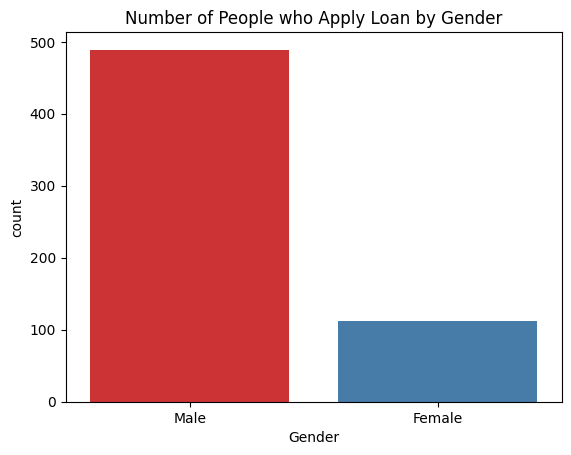

In [ ]:
# Plot the number of people who apply loan based on Gender

print('Number of people who apply loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data = df, palette='Set1').set(title = "Number of People who Apply Loan by Gender")

Number of people who apply loan by maritel status
Married
Yes    398
No     213
Name: count, dtype: int64


[Text(0.5, 1.0, 'Number of People who Apply Loan by Maritel Status')]

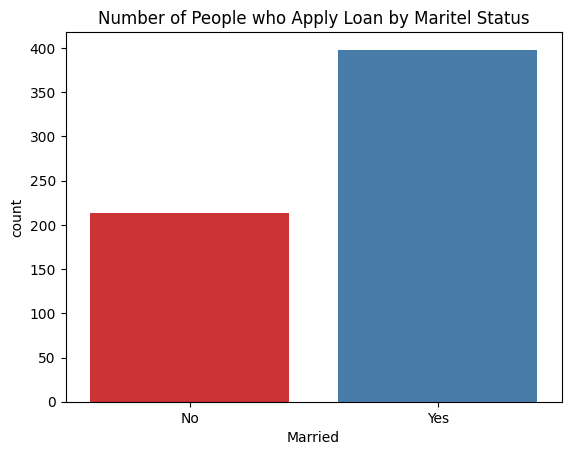

In [ ]:
# Plot the number of people who apply loan based on maritel status

print('Number of people who apply loan by maritel status')
print(df['Married'].value_counts())
sns.countplot(x='Married', data = df, palette='Set1').set(title = "Number of People who Apply Loan by Maritel Status")

Number of people who apply loan by education status
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


[Text(0.5, 1.0, 'Number of People who Apply Loan by Education Status')]

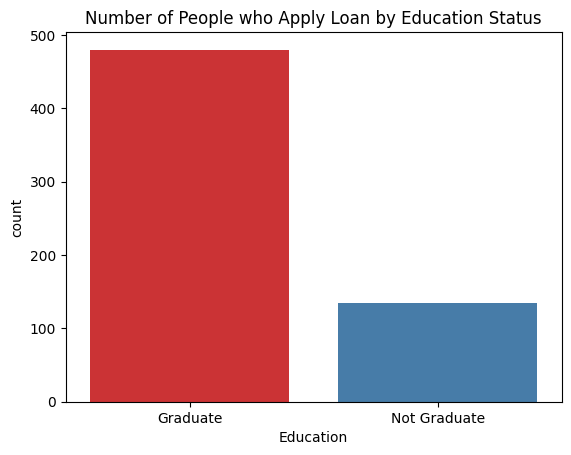

In [ ]:
# Plot the number of people who apply loan based on education status

print('Number of people who apply loan by education status')
print(df['Education'].value_counts())
sns.countplot(x='Education', data = df, palette='Set1').set(title = "Number of People who Apply Loan by Education Status")

#### Correlation Matrix
A correlation matrix plot shows the relationships between variables in a dataset. It displays scatterplots and correlation coefficients, where each coefficient ranges from -1 to 1. A coefficient of 1 means a perfect positive correlation, -1 means a perfect negative correlation, and 0 means no correlation. The diagonal typically shows the distribution of each variable.

<Axes: >

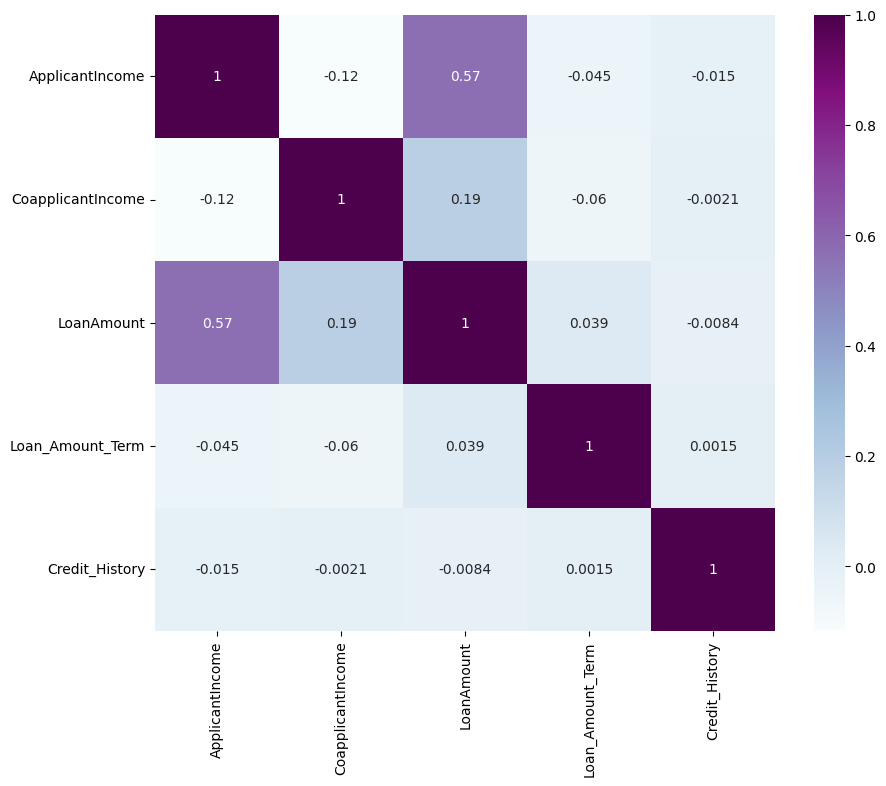

In [ ]:
#Check the correlation between the feautures

corr = df.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap = 'BuPu')

#### Check for the outliers
An outlier is a data point that is much different from the rest. It can impact machine learning results.


<Axes: >

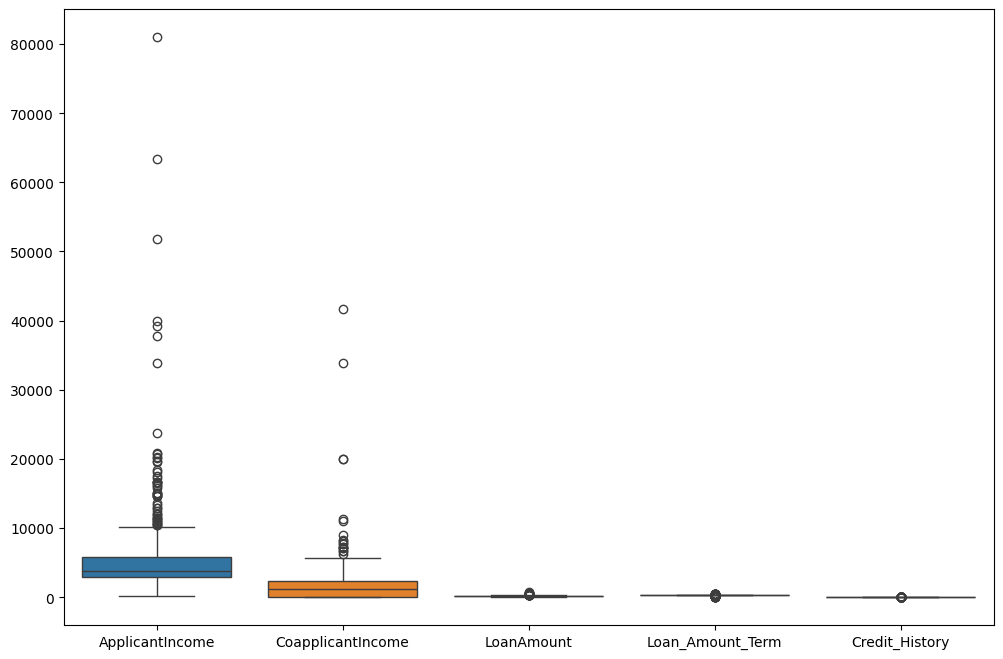

In [ ]:
#Check for the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [ ]:
# Check for the null values in train set

print("Null values in training features:")
print(X_train.isnull().sum())

Null values in training features:
Loan_ID               0
Gender               11
Married               1
Dependents           11
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     11
Credit_History       36
Property_Area         0
dtype: int64


In [ ]:
# Check for the null values in test set

print("\nNull values in testing features:")
print(X_test.isnull().sum())


Null values in testing features:
Loan_ID               0
Gender                2
Married               2
Dependents            4
Education             0
Self_Employed        12
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            6
Loan_Amount_Term      3
Credit_History       14
Property_Area         0
dtype: int64


# Data Preprocessing

**Data Pre-Processing** involves transforming raw data into a clean, usable format for machine learning. It's necessary because real-world data is often missing, inconsistent, or noisy, which can lead to poor model performance. Pre-processing ensures the data is compatible with different algorithms and improves the model's ability to detect patterns.

### Handle the Missing Data

Since median is less sensitive to outliers and mean is more sensitive to outliers. Use median for data with outliers and mean when there are no outliers. For categorical data, fill missing values with the mode.

In [ ]:
#Fill the null values of numerical datatype in training set

X_train['LoanAmount'] = X_train['LoanAmount'].fillna(X_train['LoanAmount'].mean())
X_train['Loan_Amount_Term'] = X_train['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].mean())
X_train['Credit_History'] = X_train['Credit_History'].fillna(X_train['Credit_History'].mean())

In [ ]:
#Fill the null values of object datatype in training set

X_train['Gender'] = X_train['Gender'].fillna(X_train['Gender'].mode()[0])
X_train['Married'] = X_train['Married'].fillna(X_train['Married'].mode()[0])
X_train['Dependents'] = X_train['Dependents'].fillna(X_train['Dependents'].mode()[0])
X_train['Self_Employed'] = X_train['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0])

In [ ]:
# Test the training dataset after processing the null values

print("Null values in training features after processing:")
print(X_train.isnull().sum())

Null values in training features after processing:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [ ]:
#Fill the null values of numerical datatype in test set

X_test['LoanAmount'] = X_test['LoanAmount'].fillna(X_train['LoanAmount'].median())
X_test['Loan_Amount_Term'] = X_test['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].mean())
X_test['Credit_History'] = X_test['Credit_History'].fillna(X_train['Credit_History'].mean())

In [ ]:
#Fill the null values of object datatype in test set

X_test['Gender'] = X_test['Gender'].fillna(X_train['Gender'].mode()[0])
X_test['Married'] = X_test['Married'].fillna(X_train['Married'].mode()[0])
X_test['Dependents'] = X_test['Dependents'].fillna(X_train['Dependents'].mode()[0])
X_test['Self_Employed'] = X_test['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0])

In [ ]:
# Test the testing dataset after processing the null values

print("\nNull values in testing features after processing:")
print(X_test.isnull().sum())


Null values in testing features after processing:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


### Handle the categorical features



Since all our categorical data is ordinal (with a meaningful order between values), we use Label Encoding. This method converts each unique value in a column to a numerical label.

In [ ]:
#Drop unnecessary columns
## Since the Loan_ID feature just indicating the index of the each data point


X_train = X_train.drop('Loan_ID', axis=1)
X_test = X_test.drop('Loan_ID', axis=1)

X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,Male,Yes,0.0,Graduate,No,9083,0.0,228.0,360.0,1.00000,Semiurban
377,Male,Yes,0.0,Graduate,No,4310,0.0,130.0,360.0,0.84434,Semiurban
163,Male,Yes,2.0,Graduate,No,4167,1447.0,158.0,360.0,1.00000,Rural
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.00000,Rural
132,Male,No,0.0,Graduate,No,2718,0.0,70.0,360.0,1.00000,Semiurban


In [ ]:
#Scikit-Learn library for the feature encoding
from sklearn.preprocessing import LabelEncoder

# List the categorical features
feature_cols = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area']
target_col = 'Loan_Status'

# Define the encoder
le = LabelEncoder()

# Encode the training features
for col in feature_cols:
    X_train[col] = le.fit_transform(X_train[col])

In [ ]:
# Check the datatypes of the Pandas dataframe after the transformation
print("Data types after encoding (training set):")
print(X_train.dtypes)

Data types after encoding (training set):
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object


In [ ]:
# Encode the testing features
for col in feature_cols:
    X_test[col] = le.fit_transform(X_test[col])

In [ ]:
# Check the datatypes of the Pandas dataframe after the transformation
print("Data types after encoding (testing set):")
print(X_test.dtypes)

Data types after encoding (testing set):
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object


In [ ]:
# Encode the target variable in train and test sets

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


### Standard Scale the numerical features

##### This method of scaling is basically based on the central tendencies and variance of the data.



In [ ]:
# Standard Scale the numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Display the head of the scaled training set
print(X_train_scaled[:5])


[[ 0.48637346  0.76564149  1.2636708   1.87344707 -0.39100154 -0.3670333
   0.08668355 -0.78721381  0.30889137  0.44722538  1.21879102]
 [ 0.48637346 -1.30609431 -0.72024923 -0.53377542 -0.39100154 -0.24621383
   0.34471599 -0.0858141   0.30889137  0.44722538 -1.33539518]
 [ 0.48637346  0.76564149  2.25563082  1.87344707  2.55753467  0.26897235
  -0.60393266 -0.26413606 -4.1250033   0.44722538  1.21879102]
 [ 0.48637346 -1.30609431 -0.72024923 -0.53377542 -0.39100154 -0.0883342
  -0.60393266 -0.26413606  0.30889137  0.44722538  1.21879102]
 [ 0.48637346  0.76564149  2.25563082 -0.53377542 -0.39100154 -0.34094162
  -0.12960834 -0.22847167  0.30889137 -2.42585888 -0.05830208]]


In [ ]:
# Display the head of the scaled testing set
print(X_test_scaled[:5])


[[ 0.48637346  0.76564149 -0.72024923 -0.53377542 -0.39100154  0.59852531
  -0.60393266  0.96034141  0.30889137  0.44722538 -0.05830208]
 [ 0.48637346  0.76564149 -0.72024923 -0.53377542 -0.39100154 -0.19469522
  -0.60393266 -0.2046954   0.30889137  0.         -0.05830208]
 [ 0.48637346  0.76564149  1.2636708  -0.53377542 -0.39100154 -0.21846026
  -0.05485482  0.12817226  0.30889137  0.44722538 -1.33539518]
 [-2.05603325 -1.30609431 -0.72024923 -0.53377542 -0.39100154 -0.42902183
  -0.60393266 -0.90609512  0.30889137  0.44722538 -1.33539518]
 [ 0.48637346 -1.30609431 -0.72024923 -0.53377542 -0.39100154 -0.45926825
  -0.60393266 -0.91798325  0.30889137  0.44722538 -0.05830208]]


### Handling the Imbalance Nature of the Dataset

###### We have handled the imbalanced dataset using the SMOTE method. This method involves create synthetic samples for the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_train_resampledd, y_train_resampledd = smote.fit_resample(X_train, y_train)

# Combine resampled X_train and y_train into a DataFrame (optional)
df_train_resampled = pd.concat([pd.DataFrame(X_train_resampledd, columns=X_train.columns),
                                 pd.Series(y_train_resampledd, name="target")], axis=1)

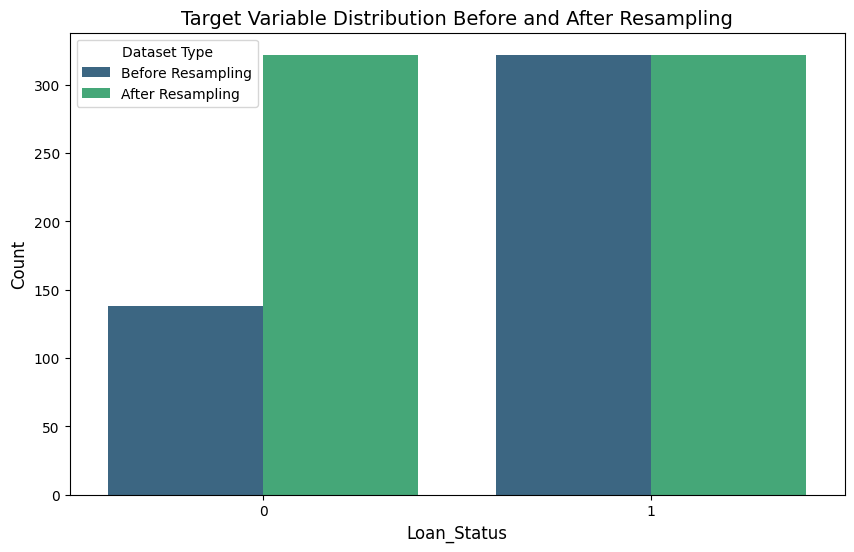

In [ ]:

df_before = pd.DataFrame({'target': y_train, 'type': 'Before Resampling'})
df_after = pd.DataFrame({'target': y_train_resampledd, 'type': 'After Resampling'})
df_combined = pd.concat([df_before, df_after])

# Draw the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='target', hue='type', palette='viridis')
plt.title('Target Variable Distribution Before and After Resampling', fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Dataset Type', fontsize=10)
plt.show()

# Machine Learning Model Development:

In [ ]:
#importing libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### Logistic Regression
###### Logistic regression is a supervised learning algorithm used for binary classification. It predicts the probability of an instance belonging to a class using a sigmoid function.

In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train_resampledd,y_train_resampledd)

# Predict on the training set
y_train_pred_model1 = model1.predict(X_train_resampledd)
train_accuracy = accuracy_score(y_train_resampledd, y_train_pred_model1)

# Predict on the testing set
y_test_pred_model1 = model1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred_model1)

print("Training Accuracy of Logistic Regression: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy of Logistic Regression: {:.2f}%".format(test_accuracy * 100))

Training Accuracy of Logistic Regression: 79.04%
Testing Accuracy of Logistic Regression: 80.52%


### Random Forest Classifier

######The Random Forest Classifier is an ensemble method that creates multiple decision trees from random subsets of the training data. It combines the predictions (votes) from each tree to make a final decision.

In [ ]:
## Random Forest Classifier
model2 = RandomForestClassifier()
model2.fit(X_train_resampledd,y_train_resampledd)

# Predict on the training set
y_train_pred_model2 = model2.predict(X_train_resampledd)
train_accuracy = accuracy_score(y_train_resampledd, y_train_pred_model2)

# Predict on the testing set
y_test_pred_model2 = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred_model2)

# Print results
print("Training Accuracy of Random Forest: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy of Random Forest: {:.2f}%".format(test_accuracy * 100))

Training Accuracy of Random Forest: 100.00%
Testing Accuracy of Random Forest: 76.62%


* **Accuracy** measures the overall correctness of the model. This can be misleading, especially with imbalanced data.

* **Precision** indicates the proportion of correct positive predictions out of all the positive predictions made

* **Recall** focuses on the model's ability to find all positive cases

* **F1 Score** is the balance between precision and recall, used when there is a trade-off. It gives a single measure of the model’s accuracy, penalizing extreme imbalances between precision and recall.

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_test,y_test_pred_model1)
generate_classification_report(model2,y_test,y_test_pred_model2)


Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.54      0.66        54
           1       0.79      0.95      0.86       100

    accuracy                           0.81       154
   macro avg       0.82      0.74      0.76       154
weighted avg       0.81      0.81      0.79       154


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        54
           1       0.77      0.91      0.83       100

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154




### **Confusion Matrix**

######A confusion matrix is a table that shows how well a machine learning model performs by comparing its predictions to the actual outcomes. It is used to evaluate classification models by displaying the count of correct and incorrect predictions, helping to measure the model's performance.

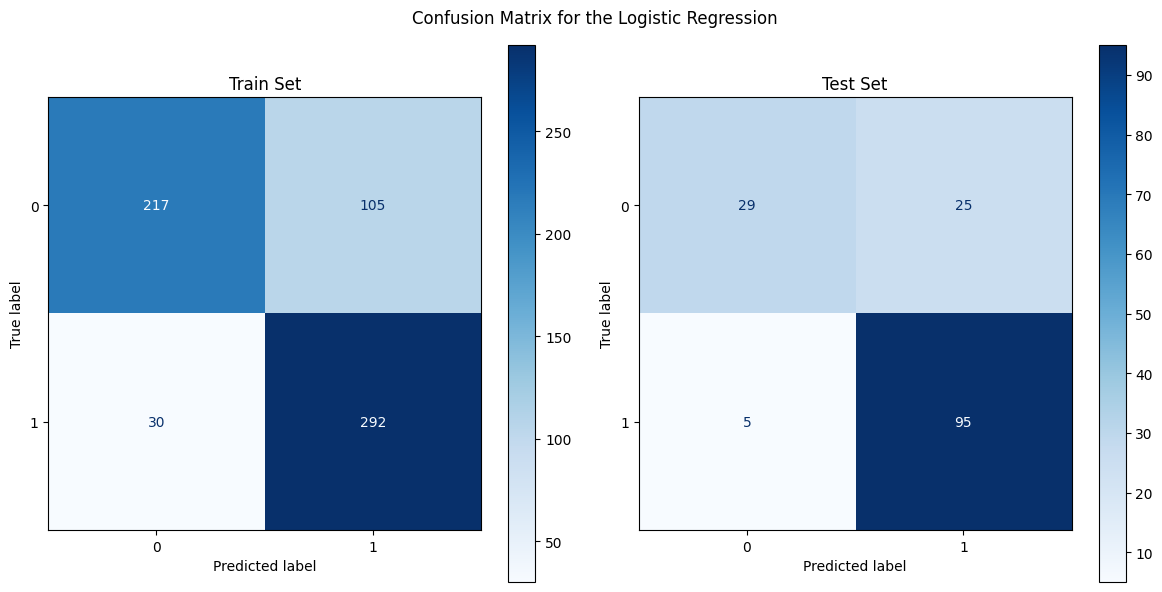

In [ ]:
# Generating confusion matrices for train and test sets

#import libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#confusion matrix for linear regression
cm_train = confusion_matrix(y_train_resampledd, model1.predict(X_train_resampledd))
cm_test = confusion_matrix(y_test, model1.predict(X_test))

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Confusion Matrix for the Logistic Regression")
ConfusionMatrixDisplay(cm_train).plot(ax=axes[0], cmap='Blues')
ConfusionMatrixDisplay(cm_test).plot(ax=axes[1], cmap='Blues')
axes[0].set_title("Train Set")
axes[1].set_title("Test Set")
plt.tight_layout()
plt.show()


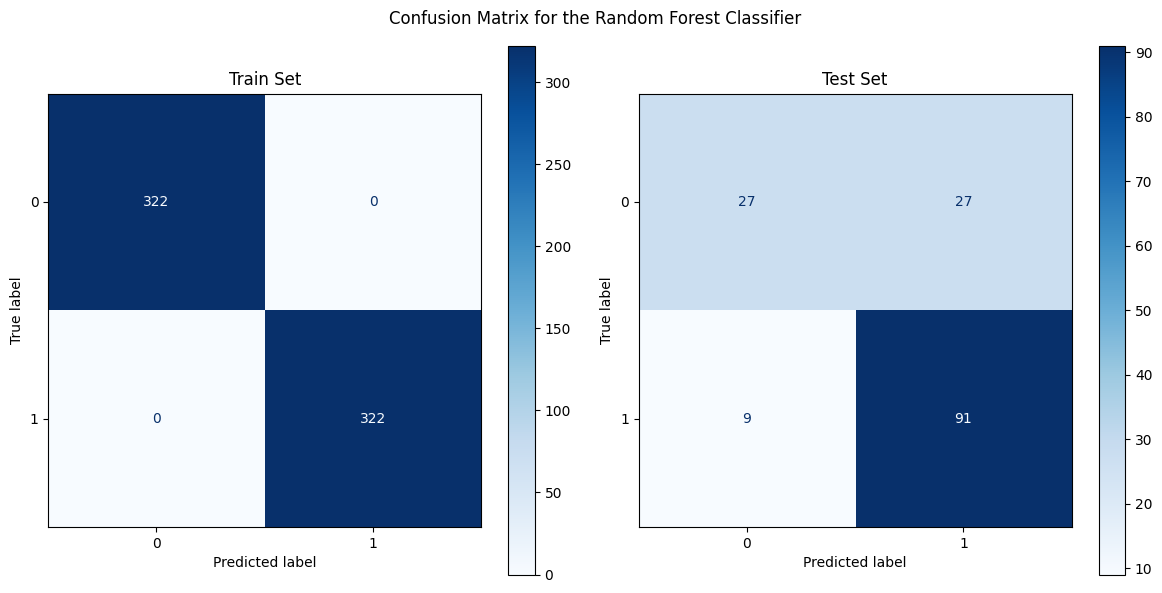

In [ ]:
#confusion matrix for random forest classifier
cmr_train = confusion_matrix(y_train_resampledd, model2.predict(X_train_resampledd))
cmr_test = confusion_matrix(y_test, model2.predict(X_test))

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Confusion Matrix for the Random Forest Classifier")
ConfusionMatrixDisplay(cmr_train).plot(ax=axes[0], cmap='Blues')
ConfusionMatrixDisplay(cmr_test).plot(ax=axes[1], cmap='Blues')
axes[0].set_title("Train Set")
axes[1].set_title("Test Set")
plt.tight_layout()
plt.show()

### **ROC Curve**

######The **AUC-ROC curve** is used to evaluate the performance of a binary classification model.

- **ROC (Receiver Operating Characteristics)** curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various classification thresholds.
  
- **AUC (Area Under the Curve)** represents the area under the ROC curve. It is a measure of the model's ability to correctly classify positive and negative instances. The value of AUC lies between 0 and 1, where a higher AUC indicates a better model performance.

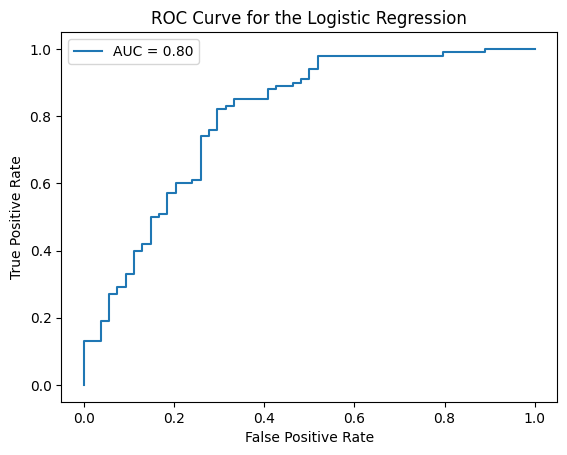

In [ ]:
# Generating the ROC (Receiver Operating Curve) for the estimator considering the test data
from sklearn.metrics import roc_curve, roc_auc_score

## Model1- Logistic regression

# Predict probabilities for the positive class
model1.fit(X_train, y_train)
y_probs_1 = model1.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_1)

# Compute AUC
auc = roc_auc_score(y_test, y_probs_1)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the Logistic Regression")
plt.legend(loc="best")
plt.show()



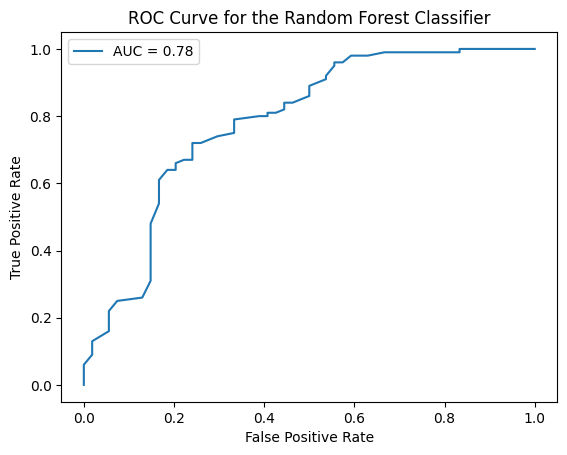

In [ ]:
#Model2- Random Forest Classifier

# Predict probabilities for the positive class
model2.fit(X_train, y_train)
y_probs_2 = model2.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_2)

# Compute AUC
auc = roc_auc_score(y_test, y_probs_2)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the Random Forest Classifier")
plt.legend(loc="best")
plt.show()

#Cross Validation

###### **Stratified Cross-Validation** ensures each fold of cross-validation maintains the same class distribution as the whole dataset, which is important for imbalanced data.

- The dataset is split into **k folds** with proportional class distribution.
- Each fold is used as the **test set** once, while the others serve as the **training set**.

It helps improve model performance by ensuring balanced representation of all classes.

In [ ]:
#k-fold cross validation with five folds fir the Linear Regression

from sklearn.model_selection import StratifiedKFold, cross_val_score

#k-fold cross validation for the test dataset
model1 = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model1, X_test, y_test, cv=skf, scoring='accuracy')
print("Accuracy scores for the test data set:", scores*100)
print("Mean accuracy for the test data set:", scores.mean()*100)



#k-fold cross validation for the train dataset

model1 = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model1, X_train_resampledd, y_train_resampledd, cv=skf, scoring='accuracy')
print("Accuracy scores for the train data set:", scores*100)
print("Mean accuracy for the train data set:", scores.mean()*100)




Accuracy scores for the test data set: [70.96774194 77.41935484 64.51612903 77.41935484 83.33333333]
Mean accuracy for the test data set: 74.73118279569893
Accuracy scores for the train data set: [75.19379845 68.99224806 78.29457364 75.19379845 82.03125   ]
Mean accuracy for the train data set: 75.94113372093022


In [ ]:
#k-fold cross validation with five folds fir the Random Forest

from sklearn.model_selection import StratifiedKFold, cross_val_score

#k-fold cross validation for the test dataset
model2 = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model2, X_test, y_test, cv=skf, scoring='accuracy')
print("Accuracy scores for the test data set:", scores*100)
print("Mean accuracy for the test data set:", scores.mean()*100)


#k-fold cross validation for the train dataset

model2 = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model2, X_train_resampledd, y_train_resampledd, cv=skf, scoring='accuracy')
print("Accuracy scores for the train data set:", scores*100)
print("Mean accuracy for the test train set:", scores.mean()*100)




Accuracy scores for the test data set: [64.51612903 74.19354839 70.96774194 77.41935484 86.66666667]
Mean accuracy for the test data set: 74.75268817204301
Accuracy scores for the train data set: [82.17054264 74.41860465 85.27131783 81.39534884 84.375     ]
Mean accuracy for the test train set: 81.52616279069768


## **GridSearchCV for Logistic Regression**

GridSearchCV trains and evaluates the Logistic Regression model for every possible combination of parameters in param_grid. For each combination, it splits the data 5 times (because cv=5), trains on 4 parts, tests on 1 part, and repeats. After trying all combinations, it picks the hyperparameters that gave the highest accuracy. The model with the best hyperparameters is stored as best_model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Define parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers supporting the penalties
    'max_iter': [100, 200, 500]  # Maximum number of iterations
}

# Step 2: Define GridSearchCV instance
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available processors
)

# Step 3: Fit the GridSearchCV instance to the imbalanced training data
grid_search.fit(X_train, y_train)  # Use your imbalanced dataset here

# Step 4: Print the mean cross-validated score of the best estimator
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Step 5: Print the best hyperparameters detected from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Step 6: Obtain the best estimator selected from the grid search
best_model = grid_search.best_estimator_
print("Best Estimator:", best_model)


Best Cross-Validated Accuracy: 0.8217391304347826
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Estimator: LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')


# Discussion

We tested two models, Logistic Regression and Random Forest Classifier, for our classification problem.

Logistic Regression showed good performance, especially for imbalanced data, with balanced recall and f1-scores.
(Training Accuracy: 79.04%,   Testing Accuracy: 80.52%,   ROC AUC: 0.8)

Random Forest overfitted the training data, showing perfect accuracy on the training set but lower accuracy on the test set.
(Training Accuracy: 100%, Testing Accuracy: 74.68%, ROC AUC: 0.78)

Since the dataset is imbalanced, we did not rely solely on accuracy. We considered other metrics like f1-score and ROC AUC for better evaluation.

We applied cross-validation to Random Forest to address overfitting, which improved its test accuracy. After cross-validation, the results were:

Logistic Regression:

Mean Accuracy (Test Data): 74.73%
Mean Accuracy (Train Data): 75.94%
Random Forest:

Mean Accuracy (Test Data): 75.38%
Mean Accuracy (Train Data): 82.92%


# Conclusion

Overall, to predict loan approval using this imbalanced dataset, **Logistic Regression** performed better due to its balanced recall, precision, and f1-scores, especially for the positive class. It achieved a stable ROC AUC of **0.8** and avoided overfitting compared to Random Forest. Random Forest's tendency to overfit was addressed using cross-validation, which improved its test performance. While Random Forest also showed good results, its tendency to overfit made Logistic Regression a more reliable choice for this task.

# References
**Dataset:**

Loan Prediction Problem Dataset: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

**Libraries and Tools:**

Scikit-learn Documentation:  https://scikit-learn.org/

Pandas Documentation: https://pandas.pydata.org/docs/

Seaborn Documentation: https://seaborn.pydata.org/

Matplotlib Documentation: https://matplotlib.org/

**Other:**

Articles on data preprocessing, handling imbalanced data and evaluation metrics.
